<a href="https://www.kaggle.com/code/ahana09/ps-s3e20-eda-rabdomforest?scriptVersionId=140898295" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Libraries

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 80)
import numpy as np
from datetime import datetime
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white', palette = 'rocket')
palt=sns.color_palette("rocket")
import geopy
from geopy.geocoders import Nominatim
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Insights about data

In [2]:
train = pd.read_csv('../input/playground-series-s3e20/train.csv')
test = pd.read_csv('../input/playground-series-s3e20/test.csv')
sub = pd.read_csv('../input/playground-series-s3e20/sample_submission.csv')

In [3]:
print('Train dimension:', train.shape)
print('Test dimension:', test.shape)

Train dimension: (79023, 76)
Test dimension: (24353, 75)


In [4]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.

In [5]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.125000,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,1.679787e-05,0.000038,0.000109,8

In [6]:
len(train.groupby(['latitude', 'longitude']).nunique())

497

In [7]:
train.groupby(['latitude', 'longitude']).size()

latitude  longitude
-3.299    30.301       159
-3.287    29.713       159
-3.174    29.926       159
-3.161    28.839       159
-3.153    30.347       159
                      ... 
-0.598    29.102       159
-0.569    30.031       159
-0.547    29.653       159
-0.528    29.472       159
-0.510    29.290       159
Length: 497, dtype: int64

In [8]:
len(test.groupby(['latitude', 'longitude']).nunique())

497

In [9]:
test.groupby(['latitude', 'longitude']).size()

latitude  longitude
-3.299    30.301       49
-3.287    29.713       49
-3.174    29.926       49
-3.161    28.839       49
-3.153    30.347       49
                       ..
-0.598    29.102       49
-0.569    30.031       49
-0.547    29.653       49
-0.528    29.472       49
-0.510    29.290       49
Length: 497, dtype: int64

#### Some insights about the data:
* There are 497 geopraphical points in both train and test datasets.
* There are 159 records for each geographical point in train data. Hence, the total number of rows: 497*159=79023
* There are 49 records for each geographical point in test data. Hence, the total number of rows: 497*49=24353
* We can see there are missing values in both train and test data

In [10]:
train.isna().sum().sort_values(ascending = False)

UvAerosolLayerHeight_aerosol_height          78584
UvAerosolLayerHeight_solar_zenith_angle      78584
UvAerosolLayerHeight_solar_azimuth_angle     78584
UvAerosolLayerHeight_sensor_azimuth_angle    78584
UvAerosolLayerHeight_aerosol_pressure        78584
                                             ...  
latitude                                         0
week_no                                          0
year                                             0
longitude                                        0
emission                                         0
Length: 76, dtype: int64

In [11]:
test.isna().sum().sort_values(ascending = False)

UvAerosolLayerHeight_aerosol_pressure         22260
UvAerosolLayerHeight_aerosol_optical_depth    22260
UvAerosolLayerHeight_sensor_zenith_angle      22260
UvAerosolLayerHeight_sensor_azimuth_angle     22260
UvAerosolLayerHeight_aerosol_height           22260
                                              ...  
latitude                                          0
week_no                                           0
year                                              0
longitude                                         0
ID_LAT_LON_YEAR_WEEK                              0
Length: 75, dtype: int64

In [12]:
nans_cols = [c for c in train.columns if train[c].isna().sum()>1 and train[c].dtypes!='O']

In [13]:
for c in nans_cols:
    train[c].fillna(train[c].median(),inplace=True)

In [14]:
for c in nans_cols:
    test[c].fillna(test[c].median(),inplace=True)

In [15]:
test.isna().sum().sort_values(ascending = False)

ID_LAT_LON_YEAR_WEEK                                       0
Ozone_solar_zenith_angle                                   0
Ozone_sensor_zenith_angle                                  0
Ozone_sensor_azimuth_angle                                 0
Ozone_cloud_fraction                                       0
                                                          ..
NitrogenDioxide_stratospheric_NO2_column_number_density    0
NitrogenDioxide_tropospheric_NO2_column_number_density     0
NitrogenDioxide_NO2_column_number_density                  0
CarbonMonoxide_solar_zenith_angle                          0
Cloud_solar_zenith_angle                                   0
Length: 75, dtype: int64

## EDA

In [16]:
train.groupby(['latitude', 'longitude'])['emission'].mean().sort_values(ascending=False)

latitude  longitude
-2.378    29.222       2233.431628
-2.079    29.321       1221.886518
-1.346    31.254        475.289138
-0.956    30.744        455.398039
-1.342    31.358        409.606870
                          ...     
-1.505    30.995          0.000000
-1.328    28.872          0.000000
-1.833    28.467          0.000000
-1.839    28.761          0.000000
-2.859    29.041          0.000000
Name: emission, Length: 497, dtype: float64

In [17]:
def geo_info(latitude,longitude):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.reverse(str(latitude)+","+str(longitude))
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    print('City : ', city)
    print('State : ', state)
    print('Country : ', country)

In [18]:
# Some locations with very high emissions

print(geo_info(-2.378,29.222)) # emission: 2233.431628
print("----")
print(geo_info(-2.079,29.321)) # emission: 1221.886518
print("----")
print(geo_info(-1.346,31.254)) # emission: 475.289138

City :  Cyato
State :  Iburengerazuba
Country :  Rwanda
None
----
City :  
State :  Iburengerazuba
Country :  Rwanda
None
----
City :  
State :  Kagera
Country :  Tanzania
None


In [19]:
# Some locations with low emissions

print(geo_info(-2.859,29.041 )) # emission: 0.000000
print("----")
print(geo_info(-1.839,28.761)) # emission: 0.000000
print("----")
print(geo_info(-1.833,28.467)) # emission: 0.000000

City :  Uvira
State :  Sud-Kivu
Country :  République démocratique du Congo
None
----
City :  
State :  Sud-Kivu
Country :  République démocratique du Congo
None
----
City :  
State :  Nord-Kivu
Country :  République démocratique du Congo
None


In [20]:
basemap = folium.Map(location = [-2.5 , 30], zoom_start =8)

map = folium.plugins.HeatMap( 
    list(zip(train.latitude.values, train.longitude.values, train.emission.values)),
    min_opacity = 0.2, radius = 20, blur = 10, max_zoom = 1
)
map.add_to(basemap)

basemap

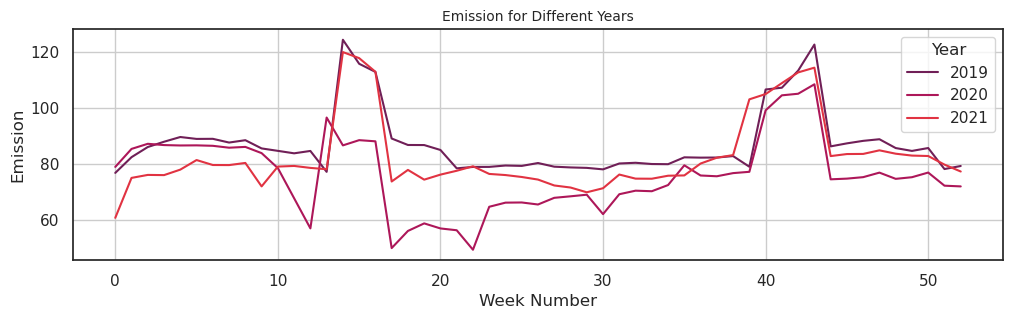

In [21]:
plt.figure(figsize=(12, 3))
sns.lineplot(x = train.week_no, y = train.emission,hue = train.year, errorbar = None,palette=[palt[1], palt[2], palt[3]])
plt.title('Emission for Different Years', fontsize=10)
plt.xlabel('Week Number')
plt.ylabel('Emission')
plt.legend(title='Year')
plt.grid()
plt.show()

* Similar seasonality is observed for every year.
* Emission is lowest in 2020. It can be because of lockdown during COVID-19

## Modelling

In [22]:
train1 = train[["latitude", "longitude", "year", "week_no", "emission"]]
test1 = test[["latitude", "longitude", "year", "week_no"]]

In [23]:
X=train1.drop("emission",axis=1)
y=train1["emission"]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
model1=RandomForestRegressor(n_estimators=20,random_state=42)

In [26]:
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

In [27]:
print("Score is =",sqrt(mean_absolute_error(y_test,pred1)))

Score is = 1.9376879104764078


In [34]:
pred=model1.predict(test1)

In [35]:
sub['emission']=pred*1.05

In [36]:
test['emission']=pred

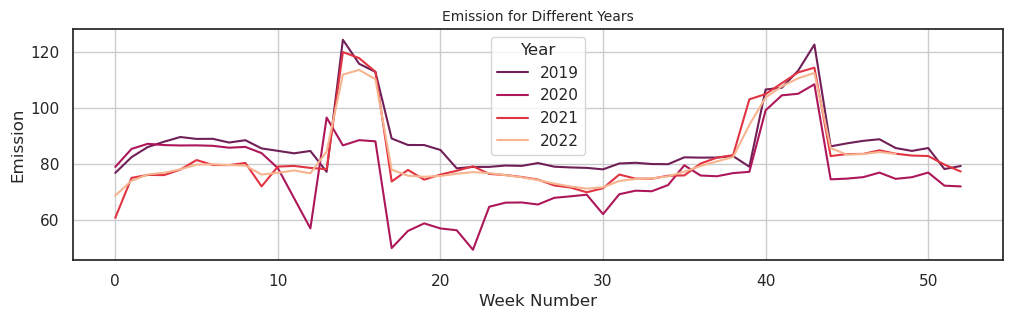

In [37]:
plt.figure(figsize=(12, 3))
sns.lineplot(x = train.week_no, y = train.emission,hue = train.year, errorbar = None,palette=[palt[1], palt[2], palt[3]])
sns.lineplot(x = test.week_no, y = test.emission,hue = test.year, errorbar = None,palette=[palt[5]])
plt.title('Emission for Different Years', fontsize=10)
plt.xlabel('Week Number')
plt.ylabel('Emission')
plt.legend(title='Year')
plt.grid()
plt.show()

In [38]:
sub.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.484088
1,ID_-0.510_29.290_2022_01,3.587400
2,ID_-0.510_29.290_2022_02,4.191317
3,ID_-0.510_29.290_2022_03,4.320238
4,ID_-0.510_29.290_2022_04,4.357368


In [40]:
sub.to_csv('submission.csv', index = False)